In [1]:
# example of loading the generator model and generating images
import numpy as np
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.models import load_model
from matplotlib import pyplot

In [2]:
embed=load_model('embed.h5')
with open('d_loss1.npy', 'rb') as f:
    d1 = np.load(f)
with open('d_loss2.npy', 'rb') as f:
    d2 = np.load(f)
with open('g_loss.npy', 'rb') as f:
    g = np.load(f)

In [3]:
def pred(da):
    tmp=[]
    for i in range(len(da)):
        x1=np.reshape(da[i],(-1,28,28,1))
        tmp.append(embed.predict(x=x1))
    return (np.array(tmp))

In [4]:
# load fashion mnist images
def load_real_samples():
    # load dataset
    with open('data_sorted.npy', 'rb') as f:
         X= np.load(f)
    y=pred(X)
    return[X,y]

In [18]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples,dataset):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate labels
    images, labels = dataset
    ix = randint(0, len(images[0]), n_samples)
    labels = labels[6][ix]
    return [z_input, labels]

In [6]:
# create and save a plot of generated images
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

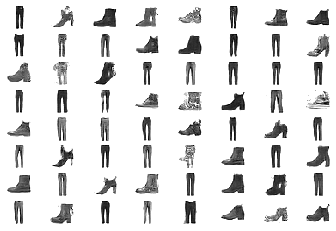

In [19]:
# load model
model = load_model('CGAN.h5')
dataset = load_real_samples()
# generate images
latent_points, labels = generate_latent_points(100, 64,dataset)
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
#X = (X + 1) / 2.0
# plot the result
save_plot(X, 8)

In [ ]:
pyplot.plot(d1)
pyplot.plot(d2)
pyplot.plot(g)
pyplot.legend(["Discriminator 1", "Discriminator 2", "Generator"], loc="upper left")
pyplot.title("Model Loss")
pyplot.ylabel("Loss")
pyplot.xlabel("epoch")
pyplot.show()

In [ ]:
pyplot.plot(d1)
pyplot.show

In [ ]:
pyplot.plot(d2)
pyplot.show

In [ ]:
pyplot.plot(g)
pyplot.show